In [1]:
from PIL import Image

import numpy as np
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#System
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
GALLERY = "Data\\Dataset 1 (ATT)\\"
## Storing Images and corresponding labels
images = list()
labels = list()
for folder in os.listdir(GALLERY):
    for img in os.listdir(GALLERY + "/" + folder):
        img = Image.open(GALLERY + "/" + folder + "/" + img)
        img = np.array(img)
        sh = img.shape
        # set 5 5900
        # set 4 36000
        if img.size == sh[0]*sh[1]:
            images.append(img)

        # folder syntax: 's' + k ,with k is id of person
            labels.append(int(folder.split("s")[1]))

In [3]:
def beautify(ax):
    ax.spines[['top','bottom','left','right']].set_visible(False)
    ax.tick_params(left=False, bottom = False, top=False, right =False)
    ax.set_yticklabels('')
    ax.set_xticklabels('')

def show_all_face_of(id):
    for i in range(len(labels)):
        if labels[i] == id:
            start = i
            break
    person = images[start:start+10]
    f, axs = plt.subplots(1, 10, figsize=(10, 10))
    axs = axs.flatten()
    for i, (img, ax) in enumerate(zip(person, axs)):
        ax.imshow(img, cmap="gray")
        beautify(ax)
    plt.show()

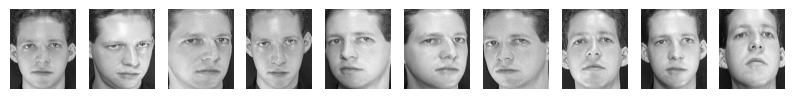

In [4]:
show_all_face_of(1)

In [5]:
# Prepare X, y for model
shape = images[0].shape
X = np.resize(images,(len(images), shape[0]*shape[1]))
y = np.array(labels).reshape(-1,1)
y.shape

(400, 1)

In [6]:
# Split data ( stratify - y assure that train/test ratio (7/3) is true for each person)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (280, 10304)
y_train shape: (280, 1)


In [7]:
# # Find the best n_components
# pca=PCA()
# pca.fit(X_train)  
# plt.figure(1, figsize=(12,8))
# plt.plot(pca.explained_variance_, linewidth=2) 
# plt.xlabel('Components')
# plt.ylabel('Explained Variaces')
# plt.show()

In [8]:
# plt.figure(1, figsize=(12,8))
# plt.plot(pca.explained_variance_, linewidth=2) 
# plt.xlim([0,100])
# plt.xlabel('Components')
# plt.ylabel('Explained Variaces')
# plt.show()

# Tunning

In [9]:
# # Cho logistic Regression

# # Define a range of parameters for Grid Search
# param_grid = {
#     'penalty': ['l1', 'l2'],                   # Regularization penalty
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
#     'solver': [
#         'newton-cg'
#     #     'liblinear'
#     # , 'saga'
#     ],           # Solver for optimization
#     'multi_class': ['ovr', 'multinomial'],     # Strategy for multiclass problems
#     'max_iter': [100, 200, 300],               # Maximum number of iterations
# }

# # Instantiate Logistic Regression classifier
# lr = LogisticRegression()

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# # Perform Grid Search
# grid_search.fit(X_train_pca, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_lr = grid_search.best_estimator_

# # Make predictions on the test data
# y_pred = best_lr.predict(X_test_pca)

# # Print classification report
# print(metrics.classification_report(y_test, y_pred))

In [10]:
# # Cho Linear Discre Analyst

# param_grid = {
#     'solver': ['svd', 'lsqr', 'eigen'],         # LDA solver methods
#     'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Shrinkage parameter
#     'n_components': [None, 1, 2, 3, 4, 5],       # Number of components to keep
#     'tol': [1e-4, 1e-3, 1e-2],                   # Tolerance for eigenvalues
#     'store_covariance': [True, False],           # Whether to store the covariance matrix
#     'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5]],  # Class priors
# }

# # Instantiate LDA classifier
# lda = LinearDiscriminantAnalysis()

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')

# # Perform Grid Search
# grid_search.fit(X_train_pca, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_lda = grid_search.best_estimator_

# # Make predictions on the test data
# y_pred = best_lda.predict(X_test_pca)

# # Print classification report
# print(metrics.classification_report(y_test, y_pred))

In [11]:
# # Cho SVM

# from sklearn.svm import SVC

# # Define a range of parameters for Grid Search
# param_grid = {
#     'C': [0.2, 2, 10],                  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],        # Kernel type
#     'gamma': ['scale', 'auto'],         # Kernel coefficient
#     'degree': [1, 2, 3, 4, 5],          # Degree of the polynomial kernel function
#     'shrinking': [True, False]          # Whether to use the shrinking heuristic
# }

# # Instantiate SVM classifier
# svm = SVC()

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# # Perform Grid Search
# grid_search.fit(X_train_pca, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_svm = grid_search.best_estimator_

# # Make predictions on the test data
# y_pred = best_svm.predict(X_test_pca)

# # Print classification report
# print(metrics.classification_report(y_test, y_pred))

In [12]:
# def evaluate(X_train, X_test, y_train, y_test, dim_red_method, method_name):

#     #Transform  input
#     dim_red_method.fit(X_train)
#     dim_red_method.fit(X_test)
#     X_train = dim_red_method.transform(X_train)
#     X_test = dim_red_method.transform(X_test)

#     # Euclide
#     method = KNeighborsClassifier(n_neighbors=1, metric= 'euclidean')
#     method.fit(X_train, y_train)
#     y_pred_euc = method.predict(X_test)

#     # LDA
#     # {'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}
#     lda = LinearDiscriminantAnalysis(n_components= None, priors= None, shrinkage= None, solver= 'svd', store_covariance= True, tol= 0.0001)
#     lda.fit(X_train, y_train)
#     y_pred_lda = lda.predict(X_test)

#     # Logistic Regression
#     # {'C': 0.1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
#     lr = LogisticRegression(C=1, max_iter= 100, multi_class= 'ovr', penalty= 'l2', solver= 'newton-cg')
#     lr.fit(X_train, y_train)
#     y_pred_lr = lr.predict(X_test)


#     # Combined 
#     pipeline = Pipeline([
#         ('lda',  lda),\
#         ('logreg', lr),\
#     ])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)

#     # SVM
#     # {'C': 2, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
#     svc = SVC(C = 2, degree = 1, gamma = 'scale', kernel= 'rbf', shrinking= True)
#     svc.fit(X_train, y_train)
#     y_pred_svc = svc.predict(X_test)


#     # Validation on test set
#     acc = {
#         'Euclide': metrics.accuracy_score(y_test, y_pred_euc),\
#         'LDA': metrics.accuracy_score(y_test, y_pred_lda),\
#         'LR' : metrics.accuracy_score(y_test, y_pred_lr),\
#         'LDA + LR' : metrics.accuracy_score(y_test, y_pred),\
#         'SVC' : metrics.accuracy_score(y_test, y_pred_svc)
#     }

#     return pd.DataFrame.from_dict(acc, orient='index',columns=[method_name])


# Tunning + Cross Validation

In [13]:
# # Leave One Out 

# for name, model in models:
#     loo_cv=LeaveOneOut()
#     cv_scores=cross_val_score(model, X_pca, labels, cv=loo_cv)
#     print("{} LOO mean cross validations score: {:.2f}".format(name, cv_scores.mean()))

In [14]:
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

In [15]:
def tunning(X_train, X_test, y_train, dim_red_method):

    #Transform  input
    dim_red_method.fit(X_train)
    X_train = dim_red_method.transform(X_train)
    X_test = dim_red_method.transform(X_test)

    # LDA
    print('tunning LDA')
    param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],         # LDA solver methods
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Shrinkage parameter
    'n_components': [None, 1, 2, 3, 4, 5],       # Number of components to keep
    'tol': [1e-4, 1e-3, 1e-2],                   # Tolerance for eigenvalues
    'store_covariance': [True, False],           # Whether to store the covariance matrix
    'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5]],  # Class priors
}
    lda = LinearDiscriminantAnalysis()  
    grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_lda = grid_search.best_estimator_
    # best_lda = LinearDiscriminantAnalysis(n_components= None, priors= None, shrinkage= None, solver= 'svd', store_covariance= True, tol= 0.0001)




    # Logistic Regression
    print('tunning LR')

    param_grid = {
    'penalty': ['l1', 'l2'],                   # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
    'multi_class': ['ovr', 'multinomial'],     # Strategy for multiclass problems
    'max_iter': [100, 200, 300],               # Maximum number of iterations
    }
    lr = LogisticRegression()
    grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_lr = grid_search.best_estimator_
    # best_lr = LogisticRegression(C=1, max_iter= 100, multi_class= 'ovr', penalty= 'l2', solver= 'newton-cg')




    # SVM
    print('tunning SVM')
    param_grid = {
        'C': [0.2, 2, 10],                  # Regularization parameter
        'kernel': ['linear', 'rbf', 'poly'],        # Kernel type
        'gamma': ['scale', 'auto'],         # Kernel coefficient
        'degree': [1, 2, 3, 4, 5],          # Degree of the polynomial kernel function
    }
    svc = SVC()
    grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_svc = grid_search.best_estimator_
    # best_svc = SVC(C = 2, degree = 1, gamma = 'scale', kernel= 'rbf', shrinking= True)
    
    models=[]
    models.append(("Euclide", KNeighborsClassifier(n_neighbors=1, metric= 'euclidean')))
    models.append(("Manhattan", KNeighborsClassifier(n_neighbors=1, metric='manhattan')))
    models.append(("Minkowski", KNeighborsClassifier(n_neighbors=1, metric='minkowski')))
    models.append(("KNN", KNeighborsClassifier()))
    models.append(("NB", GaussianNB()))
    models.append(("DT", DecisionTreeClassifier()))
    models.append(("SVC", best_svc))
    models.append(('LDA', best_lda))
    models.append(("LR", best_lr))

    return models

In [16]:
def evaluate(classifiers, model, X, y):
    acc = {}
    for name, cl in classifiers:
        kfold=KFold(n_splits=5, shuffle=True, random_state=0)
        X_new = model.transform(X)    
        cv_scores=cross_val_score(cl, X_new, y, cv=kfold)
        acc[name] = cv_scores.mean()
    return pd.DataFrame.from_dict(acc, orient='index',columns=[str(model)])

In [17]:
# Create record
record = pd.DataFrame(index=['Euclide', 'Manhattan', 'Minkowski', 'KNN' ,'NB', 'DT', 'SVC', 'LDA', 'LR'])
# record = pd.DataFrame(index=['LR'])

In [18]:
model = PCA(n_components=60)
classifiers = tunning(X_train, X_test, y_train, model)
model.fit(X_train)
ans = evaluate(classifiers,model,X,labels)
record = pd.concat([record,ans],axis=1)

tunning LDA


tunning LR
tunning SVM


In [19]:
model = LocallyLinearEmbedding(n_components=100)
classifiers = tunning(X_train, X_test, y_train, model)
model.fit(X_train)
ans = evaluate(classifiers, model, X, labels)
record = pd.concat([record, ans], axis=1)

tunning LDA
tunning LR
tunning SVM


In [20]:
param_grid = {
    'n_components' : [60,61],
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : [1,2,3,4,5,6,7],
}
al = KernelPCA(n_components=61)
grid_search = GridSearchCV(estimator=al, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_


classifiers = tunning(X_train, X_test, y_train, model)
model.fit(X_train)
ans = evaluate(classifiers,model,X,labels)
record = pd.concat([record,ans],axis=1)

tunning LDA
tunning LR
tunning SVM


In [21]:
model = IncrementalPCA(n_components=60, batch_size= 60, whiten= True)
classifiers = tunning(X_train, X_test, y_train, model)
model.fit(X_train)
ans = evaluate(classifiers,model,X,labels)
record = pd.concat([record,ans],axis=1)

tunning LDA
tunning LR
tunning SVM


In [ ]:
record.T.to_csv('Set1.csv')

In [ ]:
# param_grid = {
#     'whiten' : [True, False],
#     'batch_size' : [60,61,62,62,64],
# }
# al = KernelPCA(n_components=61)


# grid_search = GridSearchCV(estimator=al, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# best = grid_search.best_estimator_

# Best parameters: {'degree': 1, 'kernel': 'linear'}

In [ ]:
# param_grid = {
#     'kernel' : ['linear', 'poly', 'rbf'],
#     'degree' : [1,2,3,4,5,6,7],
# }
# al = KernelPCA(n_components=61)


# grid_search = GridSearchCV(estimator=al, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# best = grid_search.best_estimator_

In [ ]:
# param_grid = {
#     'n_components' : range(2,100),
# }
# al = LocallyLinearEmbedding()


# grid_search = GridSearchCV(estimator=al, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)
# best = grid_search.best_estimator_